# Analysis of F1 Drivers and Constructors

# About Data

The dataset contains information about the Formula 1 World Championship from 1950 to 2023. It includes detailed race results for every Grand Prix during this period, including the drivers who competed, their finishing positions, the team they drove for, the grid positions, the lap times, and the points scored.
The dataset also includes information on the drivers and the teams that participated in each season, including their names, nationalities, and career statistics. In addition, it provides information on the circuits used for each race, including their location, length, and number of laps.
The dataset contains various statistics on the championship, including the points system used in each season, the number of races held each season, and the winners of each championship.

https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020 

# Setting up Environment

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading and Understanding Data set

In [2]:
#Importing the Formula1 Datasets to datframes

#F1 tracks/circuits
circuits = pd.read_csv("F1_Data/circuits.csv")

constructor_results= pd.read_csv("F1_Data/constructor_results.csv")

constructor_standings = pd.read_csv("F1_Data/constructor_standings.csv")

#list of all constructors that have participated in F1
constructors = pd.read_csv("F1_Data/constructors.csv")

driver_standings = pd.read_csv("F1_Data/driver_standings.csv")

#List of all drivers that have been in F1
drivers = pd.read_csv("F1_Data/drivers.csv")

lap_times = pd.read_csv("F1_Data/lap_times.csv")

pit_stops = pd.read_csv("F1_Data/pit_stops.csv")

qualifying = pd.read_csv("F1_Data/qualifying.csv")

#contains data about all the data in f1
races = pd.read_csv("F1_Data/races.csv")

#contains results of the races
results = pd.read_csv("F1_Data/results.csv")

#contains all seasons info
seasons = pd.read_csv("F1_Data/seasons.csv")

#contains sprint races info
sprint_results = pd.read_csv("F1_Data/sprint_results.csv")

status = pd.read_csv("F1_Data/status.csv")


In [3]:
circuits.shape

(77, 9)

In [4]:
constructor_results.shape

(12170, 5)

In [5]:
constructor_standings.shape

(12941, 7)

In [6]:
constructors.shape

(211, 5)

In [7]:
driver_standings.shape

(33902, 7)

In [8]:
drivers.shape

(857, 9)

In [9]:
lap_times.shape

(538121, 6)

In [10]:
pit_stops.shape

(9634, 7)

In [11]:
qualifying.shape

(9575, 9)

In [12]:
drivers.shape

(857, 9)

In [13]:
races.shape

(1102, 18)

In [14]:
results.shape

(25840, 18)

In [15]:
seasons.shape

(74, 2)

In [16]:
sprint_results.shape

(120, 16)

In [17]:
status.shape

(139, 2)

 *Quick view on F1 drivers*

In [18]:
# Total number of Drivers in F1
drivers.driverId.count()

857

There are 857 drivers that have driven F1 car

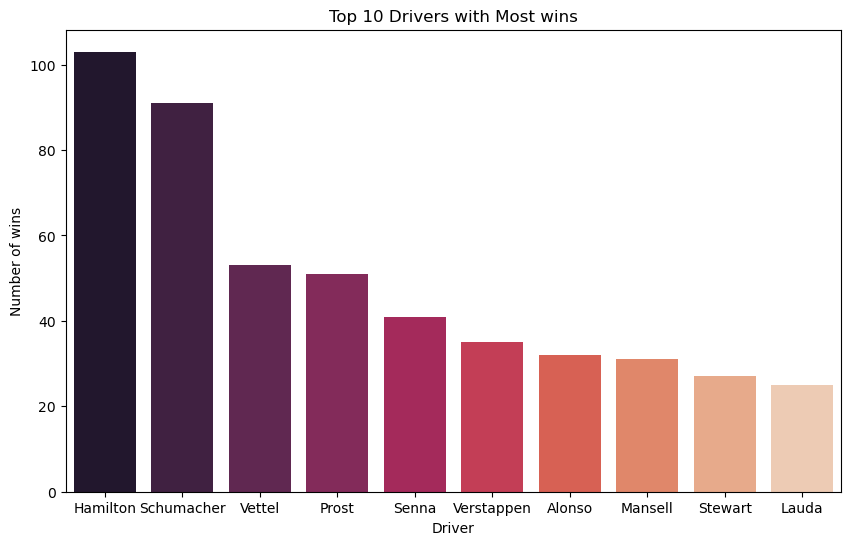

In [19]:
rank_1 = results[results["position"] == '1']

top_10 = rank_1.groupby("driverId").size().reset_index(name="count").sort_values(by="count", ascending=False).head(10)

top_10 = pd.merge(top_10, drivers[["driverId", "forename", "surname"]], on="driverId")

plt.figure(figsize=(10,6))
sns.barplot(x="surname", y="count", data=top_10, palette="rocket")
plt.title("Top 10 Drivers with Most wins")
plt.xlabel("Driver")
plt.ylabel("Number of wins")
plt.show()

 *Quick view on F1 constructors*

In [20]:
constructors.constructorId.count()

211

There are 211 constructors that have participated in F1

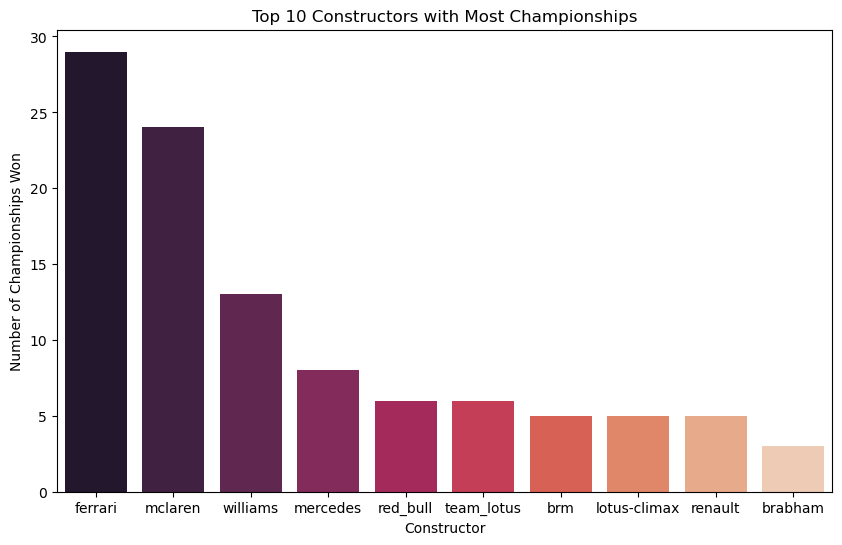

In [21]:
results_standings = pd.merge(constructor_results, constructor_standings, on=["raceId", "constructorId"])
results_standings_constructors = pd.merge(results_standings, constructors, on="constructorId")
races_results_standings_constructors = pd.merge(results_standings_constructors, races, on="raceId")

championships = races_results_standings_constructors[races_results_standings_constructors["position"]==1].groupby(["constructorRef", "year"]).size().groupby("constructorRef").size()

top_10_constructors = championships.nlargest(10).reset_index(name="championships")

plt.figure(figsize=(10,6))
sns.barplot(x="constructorRef", y="championships", data=top_10_constructors, palette="rocket")
plt.title("Top 10 Constructors with Most Championships")
plt.xlabel("Constructor")
plt.ylabel("Number of Championships Won")
plt.show()

*Quick view on F1 circuits*

In [22]:
print('circuit count :',circuits.name.count())
print('countrywise count :',circuits.groupby("country").count().circuitId)

circuit count : 77
countrywise count : country
Argentina         1
Australia         2
Austria           2
Azerbaijan        1
Bahrain           1
Belgium           3
Brazil            2
Canada            3
China             1
France            7
Germany           3
Hungary           1
India             1
Italy             4
Japan             3
Korea             1
Malaysia          1
Mexico            1
Monaco            1
Morocco           1
Netherlands       1
Portugal          4
Qatar             1
Russia            1
Saudi Arabia      1
Singapore         1
South Africa      2
Spain             6
Sweden            1
Switzerland       1
Turkey            1
UAE               1
UK                4
USA              11
United States     1
Name: circuitId, dtype: int64


Overall we have data for 77 circuits spread over accross different countries

# Data Cleaning

In [23]:
# Merging multiple dataframes to get all the related field in one frame for further analysis
constructors_result_refined = pd.merge(constructor_results,constructors,on="constructorId")
constructors_result_refined = constructors_result_refined.merge(races,on="raceId")
constructors_result_refined = constructors_result_refined.drop(["status","url_x","time","url_y"],axis=1)
constructors_result_refined = constructors_result_refined.rename(columns={"name_x":"Constructor_name","name_y":"constructor_name"})

constructor_standings_refined = constructor_standings.merge(races,on="raceId")
constructor_standings_refined = constructor_standings_refined.merge(constructors,on="constructorId")
constructor_standings_refined = constructor_standings_refined.drop(["positionText","url_y","time","url_x","nationality"],axis=1)
constructor_standings_refined = constructor_standings_refined.rename(columns={"name_x":"circuit_name","name_y":"constructor_name"})

driver_standings_refined = driver_standings.merge(drivers,on="driverId")
driver_standings_refined = driver_standings_refined.merge(races,on="raceId")
driver_standings_refined = driver_standings_refined.drop(["positionText","dob","url_x","time","number","url_y"],axis=1)

lap_times_refined = lap_times.merge(drivers,on="driverId").drop("url",axis=1)

qualifying_refined = qualifying.merge(races,on="raceId")
qualifying_refined = qualifying_refined.merge(drivers,on="driverId")
qualifying_refined = qualifying_refined.merge(constructors,on="constructorId")
qualifying_refined = qualifying_refined.drop(["number_x","url_x","dob","nationality_x","url_y","nationality_y","url"],axis=1)
qualifying_refined = qualifying_refined.rename(columns={"name_x":"circuit_name","number_y":"driver_num","name_y":"constructor_id"})

race_result_refined = results.merge(races,on="raceId")
race_result_refined = race_result_refined.merge(drivers,on="driverId")
race_result_refined = race_result_refined.merge(constructors,on="constructorId")
race_result_refined = race_result_refined.drop(["number_x","positionText","url_x","url_y","url","nationality_y","nationality_x","dob","time_y"],axis=1)
race_result_refined = race_result_refined.rename(columns={"time_x":"time","name_x":"circuit_name","number_y":"driver_num","name_y":"constructor_name"})

pit_stops_refined = pit_stops.merge(race_result_refined,on=["raceId","driverId"])
pit_stops_refined = pit_stops_refined.drop(["driverId","resultId","points","time_y","milliseconds_y","fastestLap","rank","fastestLapTime","fastestLapSpeed"],axis=1)
pit_stops_refined = pit_stops_refined.rename(columns={"time_x":"time","milliseconds_x":"milliseconds"})


In [24]:
# check for missing values and proportion of refined dataset
dfs = [
    {'name': 'constructors_result_refined', 'df': constructors_result_refined},
    {'name': 'constructor_standings_refined', 'df': constructor_standings_refined},
    {'name': 'driver_standings_refined', 'df': driver_standings_refined},
    {'name': 'lap_times_refined', 'df': driver_standings_refined},
    {'name': 'qualifying_refined', 'df': driver_standings_refined},
    {'name': 'race_result_refined', 'df': driver_standings_refined},
    {'name': 'pit_stops_refined', 'df': driver_standings_refined}
    
]
for d in dfs:
    null_count = d['df'].isnull().sum()
    null_prop = (null_count / len(d['df']))*100
    print(f'Missing Value Count and Proportion for {d["name"]}:')
    display(pd.DataFrame({'Count': null_count, 'Proportion': null_prop}))

Missing Value Count and Proportion for constructors_result_refined:


,Count,Proportion
constructorResultsId,0,0.0
raceId,0,0.0
constructorId,0,0.0
points,0,0.0
constructorRef,0,0.0
Constructor_name,0,0.0
nationality,0,0.0
year,0,0.0
round,0,0.0
circuitId,0,0.0


Missing Value Count and Proportion for constructor_standings_refined:


,Count,Proportion
constructorStandingsId,0,0.0
raceId,0,0.0
constructorId,0,0.0
points,0,0.0
position,0,0.0
wins,0,0.0
year,0,0.0
round,0,0.0
circuitId,0,0.0
circuit_name,0,0.0


Missing Value Count and Proportion for driver_standings_refined:


,Count,Proportion
driverStandingsId,0,0.0
raceId,0,0.0
driverId,0,0.0
points,0,0.0
position,0,0.0
wins,0,0.0
driverRef,0,0.0
code,0,0.0
forename,0,0.0
surname,0,0.0


Missing Value Count and Proportion for lap_times_refined:


,Count,Proportion
driverStandingsId,0,0.0
raceId,0,0.0
driverId,0,0.0
points,0,0.0
position,0,0.0
wins,0,0.0
driverRef,0,0.0
code,0,0.0
forename,0,0.0
surname,0,0.0


Missing Value Count and Proportion for qualifying_refined:


,Count,Proportion
driverStandingsId,0,0.0
raceId,0,0.0
driverId,0,0.0
points,0,0.0
position,0,0.0
wins,0,0.0
driverRef,0,0.0
code,0,0.0
forename,0,0.0
surname,0,0.0


Missing Value Count and Proportion for race_result_refined:


,Count,Proportion
driverStandingsId,0,0.0
raceId,0,0.0
driverId,0,0.0
points,0,0.0
position,0,0.0
wins,0,0.0
driverRef,0,0.0
code,0,0.0
forename,0,0.0
surname,0,0.0


Missing Value Count and Proportion for pit_stops_refined:


,Count,Proportion
driverStandingsId,0,0.0
raceId,0,0.0
driverId,0,0.0
points,0,0.0
position,0,0.0
wins,0,0.0
driverRef,0,0.0
code,0,0.0
forename,0,0.0
surname,0,0.0


It seems like a good data set and there are no missing values

# Exploratory Data Analysis

*Statistical Overview of Data*

In [25]:
dfs = [    {'name': 'constructors_result_refined', 'df': constructors_result_refined},    {'name': 'constructor_standings_refined', 'df': constructor_standings_refined},    {'name': 'driver_standings_refined', 'df': driver_standings_refined},    {'name': 'lap_times_refined', 'df': driver_standings_refined},    {'name': 'qualifying_refined', 'df': driver_standings_refined},    {'name': 'race_result_refined', 'df': driver_standings_refined},    {'name': 'pit_stops_refined', 'df': driver_standings_refined}]

for d in dfs:
    print(f'Describe and Info for {d["name"]}:')
    display(pd.concat([d['df'].describe(), d['df'].info()], axis=1))

Describe and Info for constructors_result_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12170 entries, 0 to 12169
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12170 non-null  int64  
 1   raceId                12170 non-null  int64  
 2   constructorId         12170 non-null  int64  
 3   points                12170 non-null  float64
 4   constructorRef        12170 non-null  object 
 5   Constructor_name      12170 non-null  object 
 6   nationality           12170 non-null  object 
 7   year                  12170 non-null  int64  
 8   round                 12170 non-null  int64  
 9   circuitId             12170 non-null  int64  
 10  constructor_name      12170 non-null  object 
 11  date                  12170 non-null  object 
 12  fp1_date              12170 non-null  object 
 13  fp1_time              12170 non-null  object 
 14  fp2_date           

,constructorResultsId,raceId,constructorId,points,year,round,circuitId
count,12170.000000,12170.000000,12170.000000,12170.000000,12170.000000,12170.000000,12170.000000
mean,8106.815037,505.922350,44.160394,3.788661,1993.178800,8.705505,23.191208
std,5523.404639,298.367868,57.248981,7.427196,16.811247,4.983633,18.392356
min,1.000000,1.000000,1.000000,0.000000,1956.000000,1.000000,1.000000
25%,3043.250000,278.000000,6.000000,0.000000,1980.000000,5.000000,9.000000
50%,6085.500000,474.000000,22.000000,0.000000,1992.000000,8.000000,18.000000
75%,13593.750000,713.000000,52.000000,4.000000,2008.000000,13.000000,34.000000
max,16669.000000,1096.000000,214.000000,66.000000,2022.000000,22.000000,79.000000


Describe and Info for constructor_standings_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12941 entries, 0 to 12940
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12941 non-null  int64  
 1   raceId                  12941 non-null  int64  
 2   constructorId           12941 non-null  int64  
 3   points                  12941 non-null  float64
 4   position                12941 non-null  int64  
 5   wins                    12941 non-null  int64  
 6   year                    12941 non-null  int64  
 7   round                   12941 non-null  int64  
 8   circuitId               12941 non-null  int64  
 9   circuit_name            12941 non-null  object 
 10  date                    12941 non-null  object 
 11  fp1_date                12941 non-null  object 
 12  fp1_time                12941 non-null  object 
 13  fp2_date                12941 non-null

,constructorStandingsId,raceId,constructorId,points,position,wins,year,round,circuitId
count,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000,12941.000000
mean,16573.817402,515.004946,48.070474,33.776486,7.286068,0.678927,1991.781238,8.761069,23.855343
std,8741.992501,292.559215,59.400459,76.875428,4.386319,1.818736,17.369375,4.900708,18.519886
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1958.000000,1.000000,1.000000
25%,8771.000000,294.000000,6.000000,0.000000,4.000000,0.000000,1978.000000,5.000000,9.000000
50%,20124.000000,494.000000,25.000000,6.000000,7.000000,0.000000,1990.000000,8.000000,18.000000
75%,24592.000000,714.000000,57.000000,31.000000,10.000000,0.000000,2007.000000,13.000000,36.000000
max,28412.000000,1098.000000,214.000000,765.000000,22.000000,19.000000,2023.000000,22.000000,79.000000


Describe and Info for driver_standings_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   wins               33902 non-null  int64  
 6   driverRef          33902 non-null  object 
 7   code               33902 non-null  object 
 8   forename           33902 non-null  object 
 9   surname            33902 non-null  object 
 10  nationality        33902 non-null  object 
 11  year               33902 non-null  int64  
 12  round              33902 non-null  int64  
 13  circuitId          33902 non-null  int64  
 14  name               33902 non-null  object 
 15  date               339

,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893,1984.678692,8.426848,25.663589
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981,21.017764,4.686817,19.318032
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000,1967.000000,5.000000,10.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000,1984.000000,8.000000,20.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000,2003.000000,12.000000,39.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000,2023.000000,22.000000,79.000000


Describe and Info for lap_times_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   wins               33902 non-null  int64  
 6   driverRef          33902 non-null  object 
 7   code               33902 non-null  object 
 8   forename           33902 non-null  object 
 9   surname            33902 non-null  object 
 10  nationality        33902 non-null  object 
 11  year               33902 non-null  int64  
 12  round              33902 non-null  int64  
 13  circuitId          33902 non-null  int64  
 14  name               33902 non-null  object 
 15  date               33902 non-

,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893,1984.678692,8.426848,25.663589
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981,21.017764,4.686817,19.318032
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000,1967.000000,5.000000,10.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000,1984.000000,8.000000,20.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000,2003.000000,12.000000,39.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000,2023.000000,22.000000,79.000000


Describe and Info for qualifying_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   wins               33902 non-null  int64  
 6   driverRef          33902 non-null  object 
 7   code               33902 non-null  object 
 8   forename           33902 non-null  object 
 9   surname            33902 non-null  object 
 10  nationality        33902 non-null  object 
 11  year               33902 non-null  int64  
 12  round              33902 non-null  int64  
 13  circuitId          33902 non-null  int64  
 14  name               33902 non-null  object 
 15  date               33902 non

,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893,1984.678692,8.426848,25.663589
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981,21.017764,4.686817,19.318032
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000,1967.000000,5.000000,10.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000,1984.000000,8.000000,20.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000,2003.000000,12.000000,39.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000,2023.000000,22.000000,79.000000


Describe and Info for race_result_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   wins               33902 non-null  int64  
 6   driverRef          33902 non-null  object 
 7   code               33902 non-null  object 
 8   forename           33902 non-null  object 
 9   surname            33902 non-null  object 
 10  nationality        33902 non-null  object 
 11  year               33902 non-null  int64  
 12  round              33902 non-null  int64  
 13  circuitId          33902 non-null  int64  
 14  name               33902 non-null  object 
 15  date               33902 no

,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893,1984.678692,8.426848,25.663589
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981,21.017764,4.686817,19.318032
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000,1967.000000,5.000000,10.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000,1984.000000,8.000000,20.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000,2003.000000,12.000000,39.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000,2023.000000,22.000000,79.000000


Describe and Info for pit_stops_refined:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33902 entries, 0 to 33901
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   wins               33902 non-null  int64  
 6   driverRef          33902 non-null  object 
 7   code               33902 non-null  object 
 8   forename           33902 non-null  object 
 9   surname            33902 non-null  object 
 10  nationality        33902 non-null  object 
 11  year               33902 non-null  int64  
 12  round              33902 non-null  int64  
 13  circuitId          33902 non-null  int64  
 14  name               33902 non-null  object 
 15  date               33902 non-

,driverStandingsId,raceId,driverId,points,position,wins,year,round,circuitId
count,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000,33902.000000
mean,42342.373901,569.165506,304.342782,13.329134,19.958085,0.268893,1984.678692,8.426848,25.663589
std,21668.533758,281.792241,264.834962,35.392937,16.425503,0.992981,21.017764,4.686817,19.318032
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000
25%,19594.250000,345.000000,85.000000,0.000000,8.000000,0.000000,1967.000000,5.000000,10.000000
50%,49563.500000,593.000000,219.000000,1.000000,16.000000,0.000000,1984.000000,8.000000,20.000000
75%,58779.750000,795.000000,501.000000,10.000000,26.000000,0.000000,2003.000000,12.000000,39.000000
max,71845.000000,1098.000000,858.000000,454.000000,108.000000,15.000000,2023.000000,22.000000,79.000000


*Analysis of F1 Drivers*

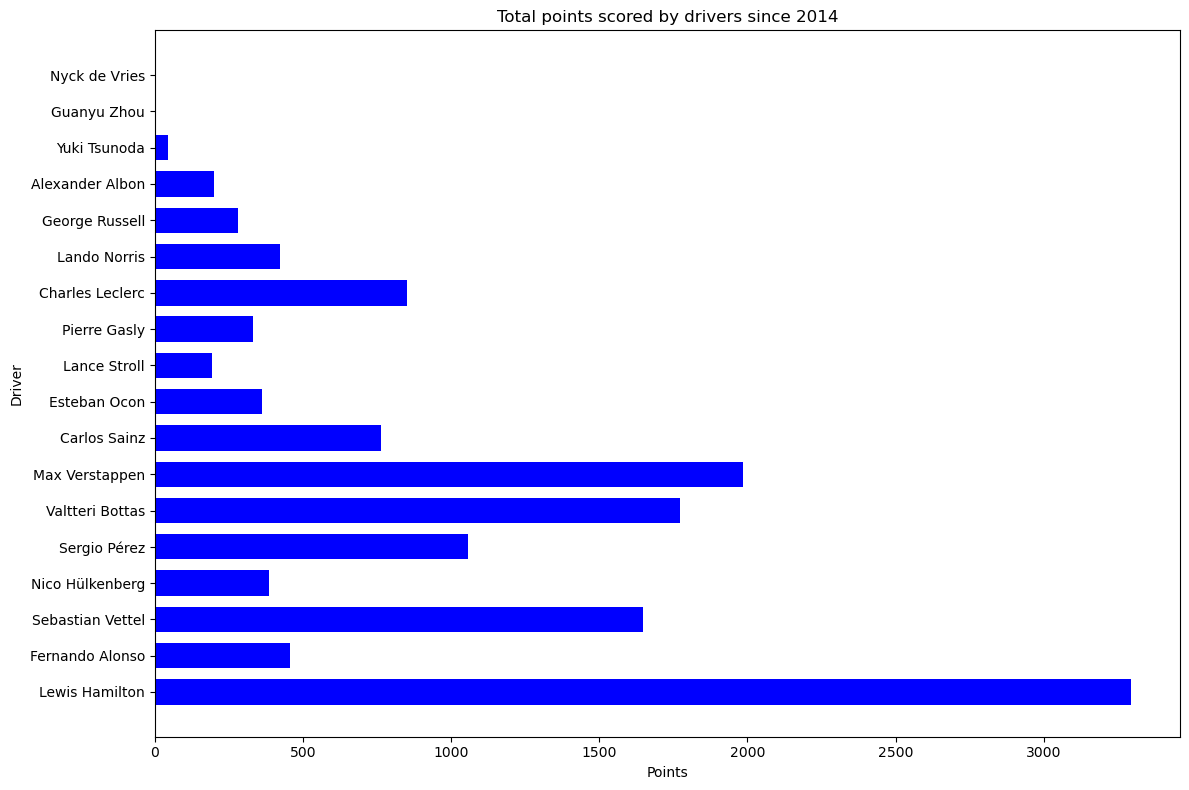

In [26]:
# Select current drivers (2023)
current_drivers = ["hamilton", "bottas", "leclerc", "vettel", "max_verstappen", 
                   "albon", "sainz", "norris", "ocon", "gasly", "perez", "stroll", 
                   "magnussen", "russell", "alonso", "piastri", "hulkenberg", 
                   "zhou", "tsunoda", "sargeant", "de_vries"]

drivers_current = drivers[drivers.driverRef.isin(current_drivers)]
current_drivers_results = results[results.driverId.isin(drivers_current["driverId"])]

# Select races since 2014
races_since_2014 = races[races.year >= 2014]
results_since_2014 = pd.merge(current_drivers_results, races_since_2014, on="raceId")

# Compute total points per driver
driver_points = results_since_2014.groupby(["driverId"]).agg({"points": "sum"})
driver_points = driver_points.reset_index()

# Join with drivers data to get full name
driver_points = pd.merge(driver_points, drivers[["driverId", "forename", "surname"]], on="driverId")
driver_points["full_name"] = driver_points["forename"] + " " + driver_points["surname"]
# Plot points aggregate by driver
plt.figure(figsize=(12, 8))
plt.barh(driver_points["full_name"], driver_points["points"], height=0.7, color='blue')
plt.title("Total points scored by drivers since 2014")
plt.xlabel("Points")
plt.ylabel("Driver")
plt.tight_layout()
plt.show()

Lewis Hamilton is the highest point scorer considering points after 2014

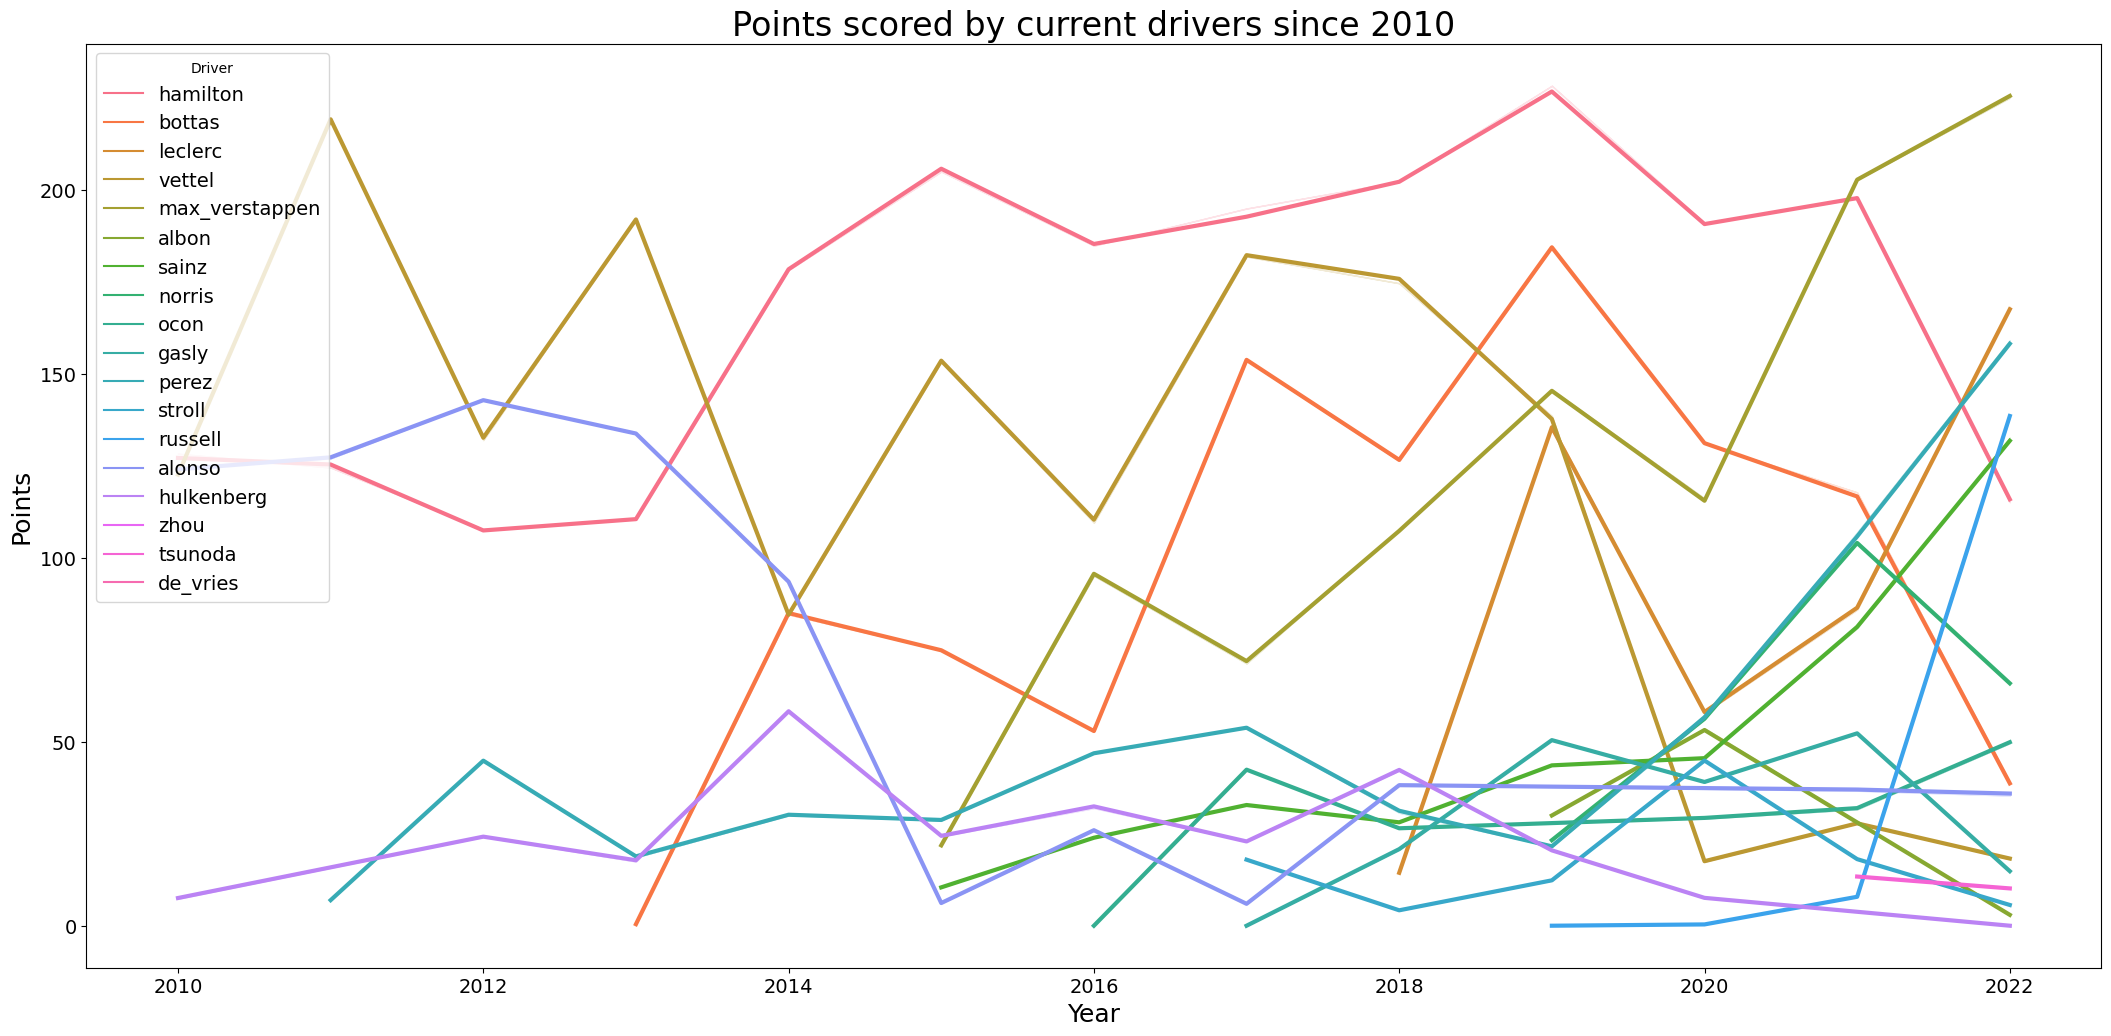

In [27]:
current_driver_standings_df = pd.DataFrame()
for drivers in current_drivers:
  current_driver_standings_df = current_driver_standings_df.append(driver_standings_refined[driver_standings_refined.driverRef == drivers])

current_driver_standings_df = current_driver_standings_df[(current_driver_standings_df.year >= 2010) & (current_driver_standings_df.year <= 2022)]

plt.figure(figsize=(26,12))
sns.lineplot(data=current_driver_standings_df, x="year", y="points", hue="driverRef", ci=False, linewidth=3)
plt.title("Points scored by current drivers since 2010", fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Points", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Driver", loc="upper left", prop={"size": 14})
plt.show()

From the graph we can see that hamilton dominated from 2014 to 2020. Max verstrappen dominated in 2021 and 2022

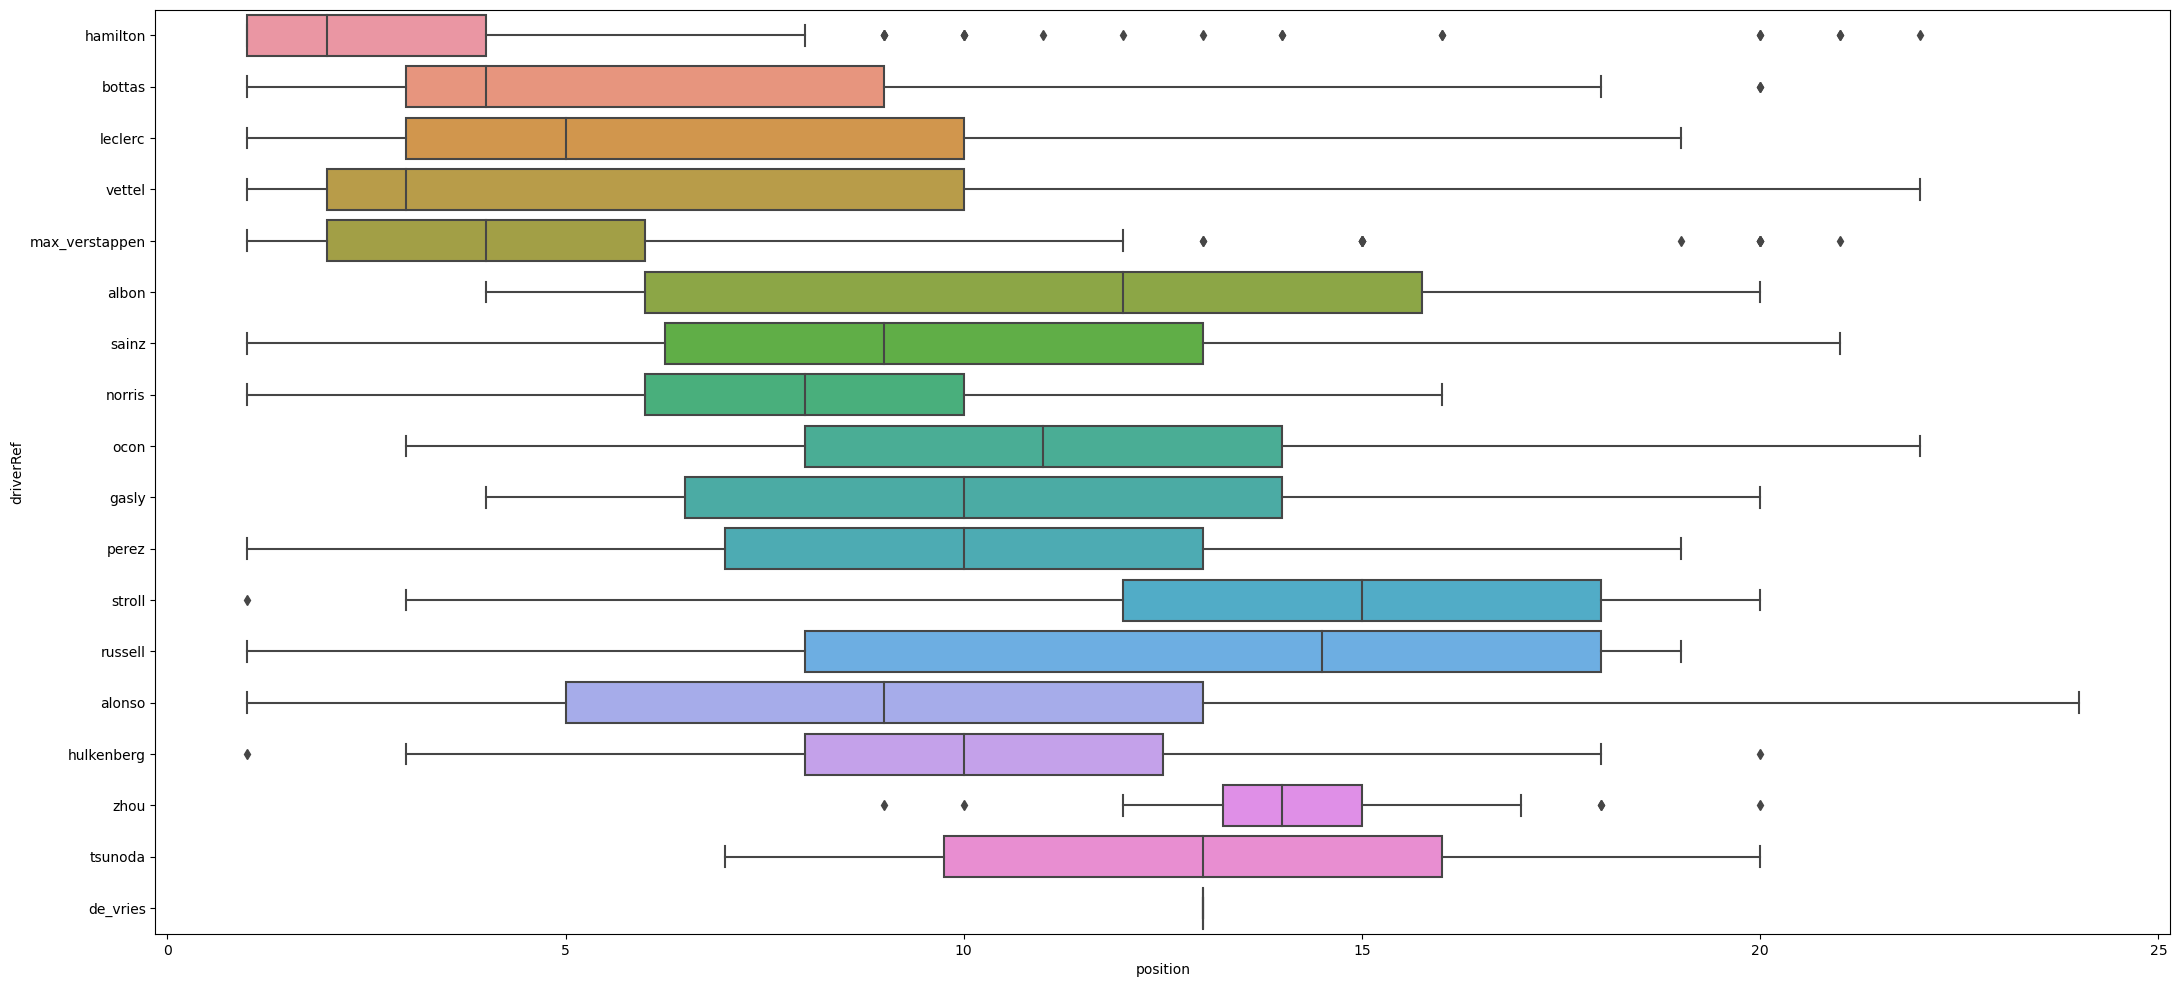

In [28]:
current_qualifying_df = pd.DataFrame()
for drivers in current_drivers:
  current_qualifying_df = current_qualifying_df.append(qualifying_refined[qualifying_refined.driverRef == drivers])

current_qualifying_df = current_qualifying_df[current_qualifying_df.year >= 2010]

current_qualifying_df

plt.figure(figsize=(26,12));
sns.boxplot(data=current_qualifying_df, x="position",y="driverRef");

lewis hamilton is most successfull in putting his car at pole position followed by Max verstrappen

*Analysis of F1 Constructors*

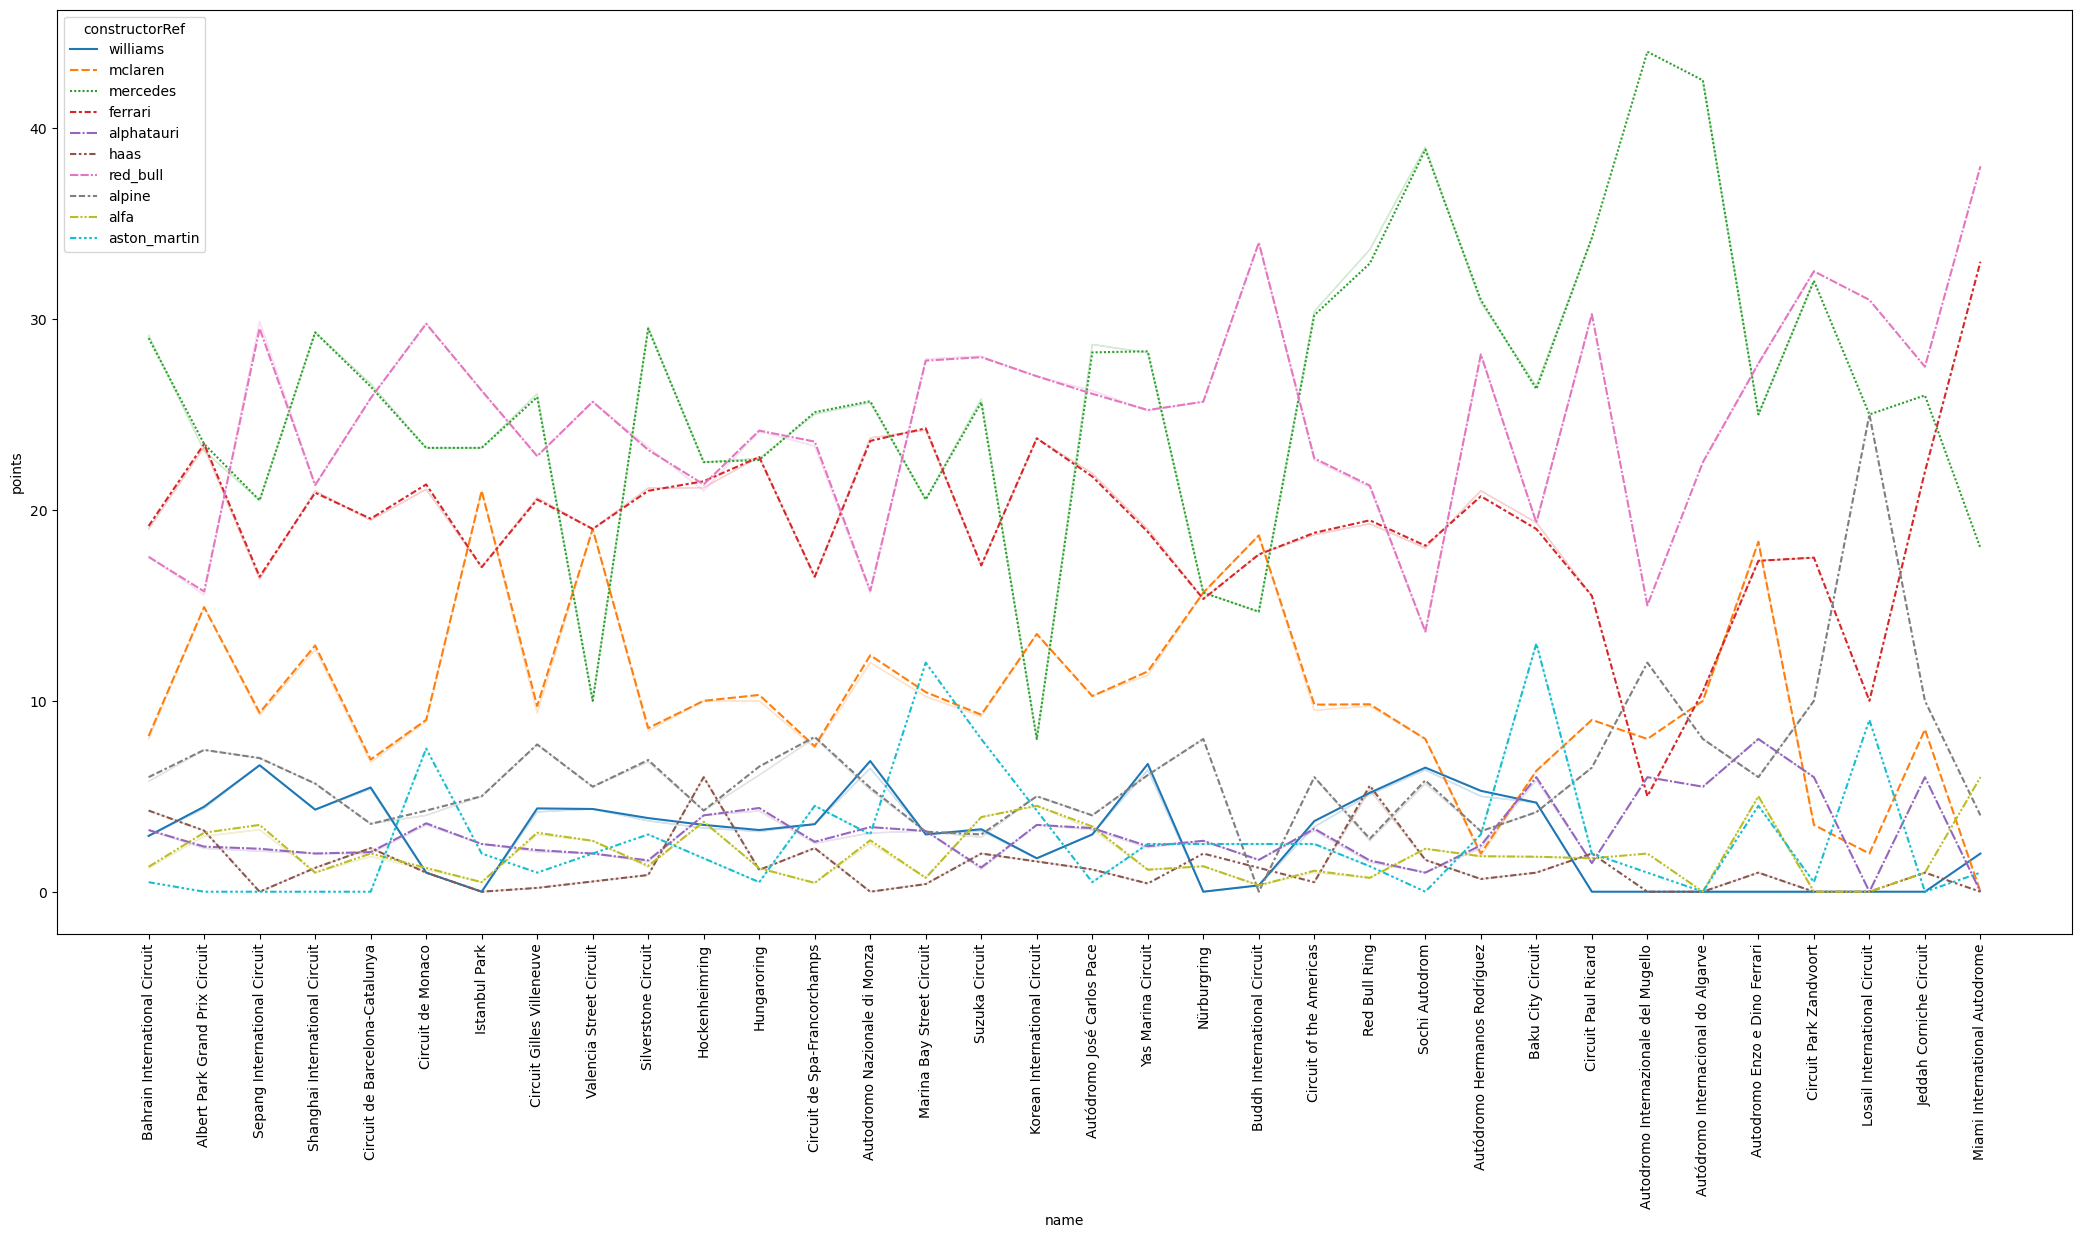

In [29]:
current_constructors = ["williams","mclaren","mercedes","ferrari","toro_rosso","alphatauri","haas","red_bull","renault","sauber","alfa","alpine","aston_martin"]
current_constructors_df = pd.DataFrame()
for constructors in current_constructors:
    current_constructors_df = current_constructors_df.append(constructors_result_refined[constructors_result_refined.constructorRef == constructors])
current_constructors_df = current_constructors_df[current_constructors_df.year >= 2010]

current_constructors_df.loc[current_constructors_df.constructorRef=="sauber","constructorRef"]="alfa"
current_constructors_df.loc[current_constructors_df.constructorRef=="toro_rosso","constructorRef"]="alphatauri"
current_constructors_df.loc[current_constructors_df.constructorRef=="renault","constructorRef"]="alpine"

# Merge with circuits DataFrame to get circuit names
current_constructors_df = current_constructors_df.merge(circuits[['circuitId', 'name']], on='circuitId', how='left')

plt.figure(figsize=(26,12))
sns.lineplot(data=current_constructors_df, x="name", y="points", hue="constructorRef", style="constructorRef", ci=False)
plt.xticks(rotation=90)
plt.show()

It seems like Mercedes and Redbull have dominated in Majority of the tracks after 2010

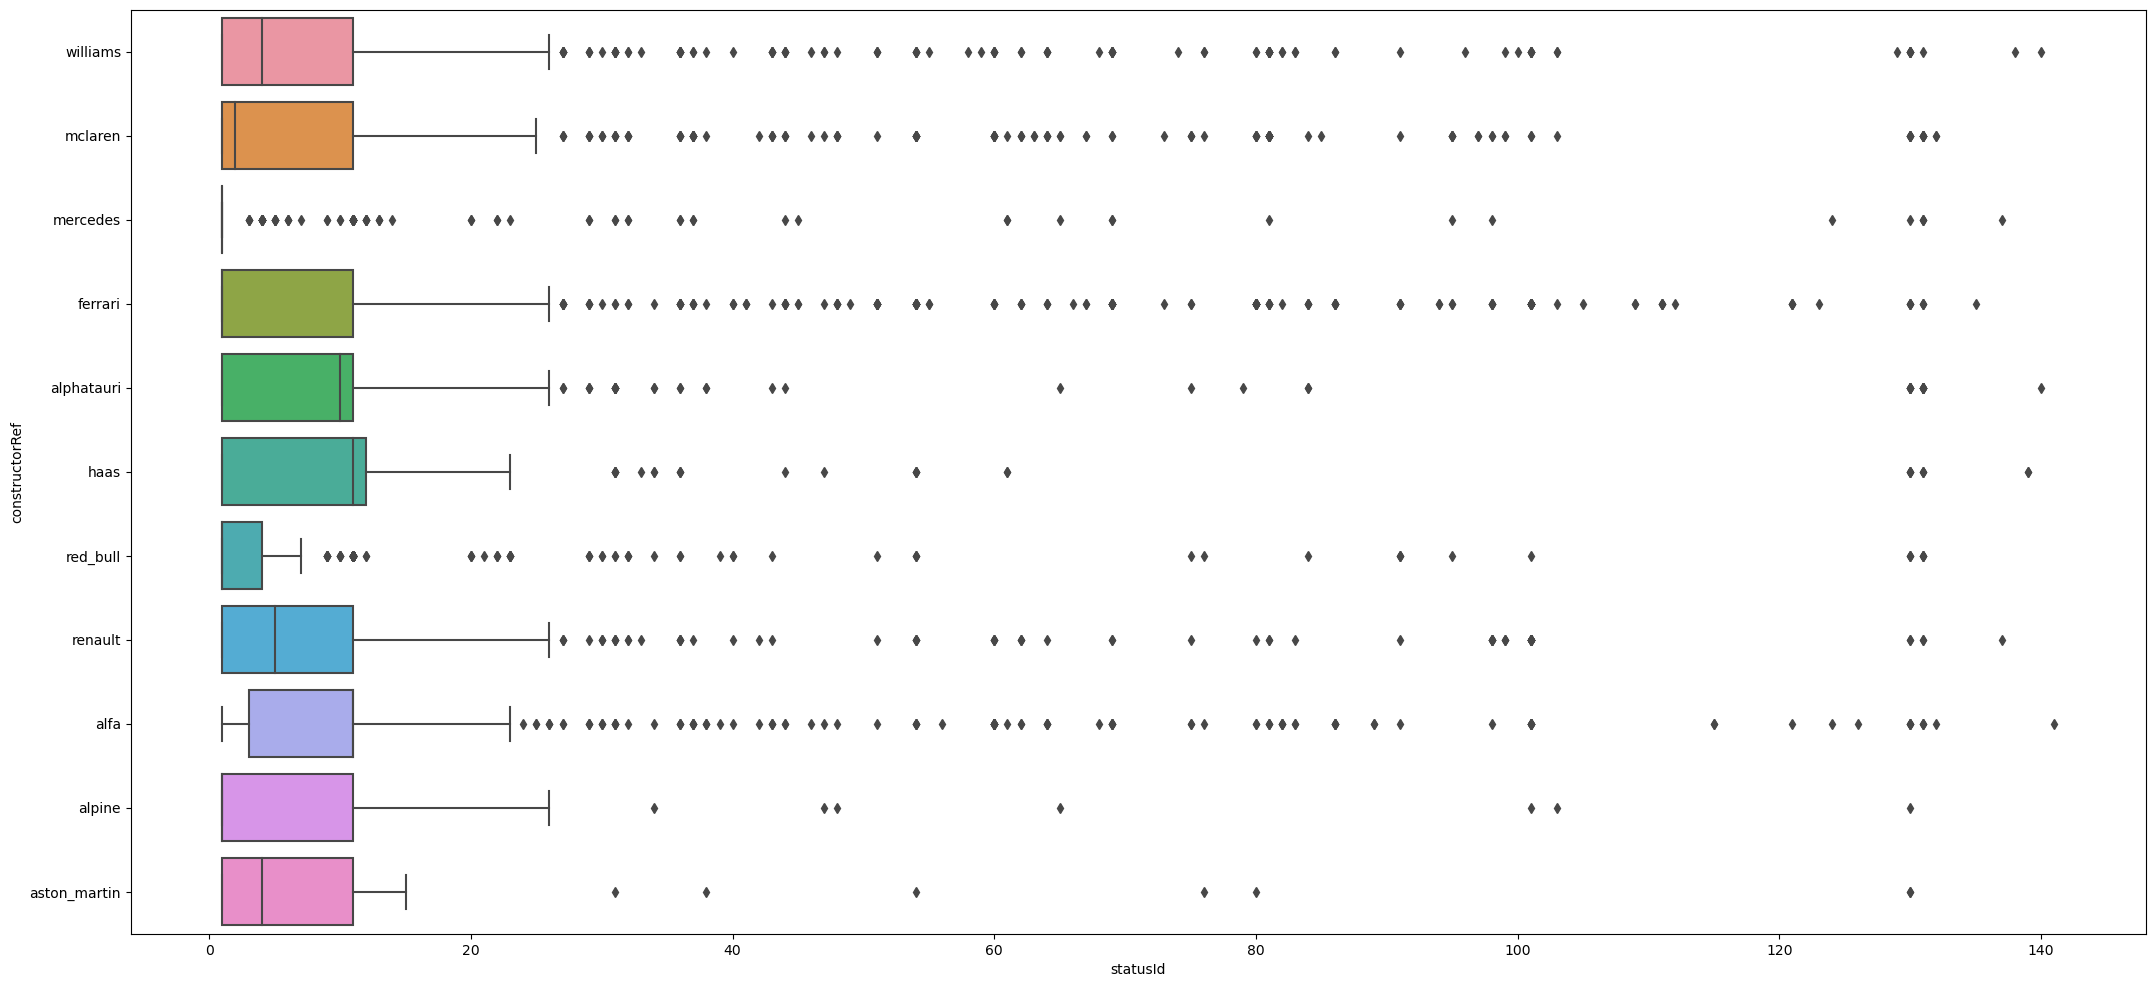

In [30]:
reliability_df = race_result_refined[["raceId","constructorRef","constructor_name","statusId"]]
reliability_df = reliability_df.merge(status,on="statusId")

current_reliability_df = pd.DataFrame()
for constructors in current_constructors:
  current_reliability_df = current_reliability_df.append(reliability_df[reliability_df.constructorRef == constructors])


current_reliability_df.loc[current_reliability_df.constructorRef=="sauber","constructorRef"]="alfa"
current_reliability_df.loc[current_reliability_df.constructorRef=="toro_rosso","constructorRef"]="alphatauri"

current_reliability_df
plt.figure(figsize=(26,12));
sns.boxplot(data=current_reliability_df, x="statusId",y="constructorRef");

Mercedes has been the most reliable car followed by Redbull

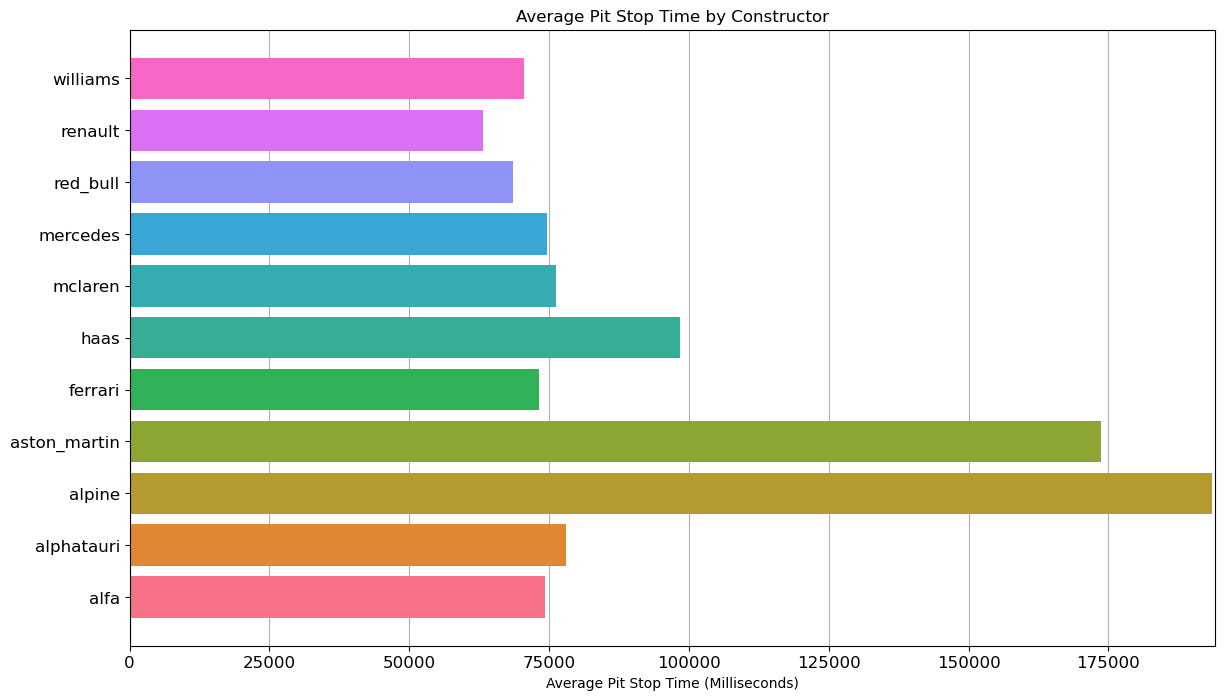

In [34]:
# Create a boolean mask to filter only the rows with constructors in `current_constructors`
mask = pit_stops_refined['constructorRef'].isin(current_constructors)
current_pitstop_df = pit_stops_refined[mask].copy()

# Rename the constructor names as necessary
current_pitstop_df['constructorRef'] = current_pitstop_df['constructorRef'].replace({
    'sauber': 'alfa',
    'toro_rosso': 'alphatauri'
})

# Calculate the average pit stop time for each constructor
avg_pitstop_times = current_pitstop_df.groupby('constructorRef')['milliseconds'].mean()

# Create a horizontal bar chart of the average pit stop times
fig, ax = plt.subplots(figsize=(14, 8))
colors = sns.color_palette('husl', len(avg_pitstop_times))
ax.barh(avg_pitstop_times.index, avg_pitstop_times.values, color=colors)

# Add labels and formatting to the plot
ax.set_title('Average Pit Stop Time by Constructor')
ax.set_xlabel('Average Pit Stop Time (Milliseconds)')
ax.xaxis.grid(True)
ax.set_axisbelow(True)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlim(0, np.ceil(avg_pitstop_times.max() / 500) * 500)

plt.show()

It is seen that Renault has better pit stop times over other teams

# Conclusion

- There are 857 drivers that have driven F1 car.
- There are 211 constructors that have participated in F1.
- Overall we have data for 77 circuits spread over accross different countries.
- Lewis Hamilton is the highest point scorer considering points after 2014.
- Mercedes has been the most reliable car followed by Redbull.
- It is seen that Renault has better pit stop times over other teams.
- Mercedes and Redbull have dominated in Majority of the tracks after 2010.
- lewis hamilton is most successfull in putting his car at pole position followed by Max verstrappen.